<a href="https://colab.research.google.com/github/karthikmnkrishna/Loan-default-prediction/blob/Build/Loan_Case_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#LOAN CASE STUDY

##DATA & LIBRARIES IMPORT

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
df = pd.read_csv('/content/drive/My Drive/Masters/loan.csv')
print(df.shape)

(39717, 111)


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## DATA CLEANING AND FORMATING

###Checking if there is any incosistency in column names

In [0]:
df.columns.values

array(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan',
       'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d',
       'last_credit_pull_d', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'application_type',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint

The column names have no formating issue

Checking for columns that have only a single value,and hence may not be considered for analysis

In [0]:
df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,...,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,14035.000000,2786.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39661.0,0.0,39717.0,0.0,0.0,0.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39661.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,35.900962,69.698134,9.294408,0.055065,13382.528086,22.088828,51.227887,50.989768,12153.596544,11567.149118,9793.348813,2263.663172,1.363015,95.221624,12.406112,2678.826162,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,22.020060,43.822529,4.400282,0.237200,15885.016641,11.401709,375.172839,373.824457,9042.040766,8942.672613,7065.522127,2608.111964,7.289979,688.744771,148.671593,4447.136012,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,18.000000,22.000000,6.000000,0.000000,3703.000000,13.000000,0.000000,0.000000,5576.930000,5112.310000,4600.000000,662.180000,0.000000,0.000000,0.000000,218.680000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,34.000000,90.000000,9.000000,0.0000

In [0]:
df.groupby(['acc_now_delinq','application_type','collections_12_mths_ex_med','initial_list_status','policy_code','pymnt_plan','chargeoff_within_12_mths','delinq_amnt','tax_liens']).count()['id']

acc_now_delinq  application_type  collections_12_mths_ex_med  initial_list_status  policy_code  pymnt_plan  chargeoff_within_12_mths  delinq_amnt  tax_liens
0               INDIVIDUAL        0.0                         f                    1            n           0.0                       0            0.0          39661
Name: id, dtype: int64

In [0]:
df.drop(['acc_now_delinq','collections_12_mths_ex_med','initial_list_status','policy_code','application_type','pymnt_plan','chargeoff_within_12_mths','delinq_amnt','tax_liens','url'] ,axis = 1,inplace= True) #REMOVING URL, AS IT SEEMS TO BE A REPITION OF ID COLUMN 

Setting index as id . it seems to be the primary keys as it has all unique values and the description vouches our assumption

In [0]:
df.set_index('id',inplace =True)

###Checking Rows for redundancy/inconsistency

In [0]:
pd.set_option("max_colwidth", None)
df.head()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,...,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,Borrower added on 12/22/11 > I need to upgrade my business technologies.<br>,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike. I only need this money because the deal im looking at is to good to pass up.<br><br> Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike.I only need this money because the deal im looking at is to good to pass up. I have finished college with an associates degree in business and its takingmeplaces<br>,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,"Borrower added on 12/21/11 > to pay for property tax (borrow from friend, need to pay back) & central A/C need to be replace. I'm very sorry to let my loan expired last time.<br>",other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,"Borrower added on 12/21/11 > I plan on combining three large interest bills together and freeing up some extra each month to pay towa

Both the header and footer look fine.There are no extra rows.

###TREATING MISSING VALUES

Lets oserve all the columns with non null and null values and get rid of the columns with only null

In [0]:
df.info(verbose=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39717 entries, 1077501 to 87023
Data columns (total 100 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   member_id                       39717 non-null  int64  
 1   loan_amnt                       39717 non-null  int64  
 2   funded_amnt                     39717 non-null  int64  
 3   funded_amnt_inv                 39717 non-null  float64
 4   term                            39717 non-null  object 
 5   int_rate                        39717 non-null  object 
 6   installment                     39717 non-null  float64
 7   grade                           39717 non-null  object 
 8   sub_grade                       39717 non-null  object 
 9   emp_title                       37258 non-null  object 
 10  emp_length                      38642 non-null  object 
 11  home_ownership                  39717 non-null  object 
 12  annual_inc               

COLUMNS WITH ONLY NULL VALUES HAVE BEEN REMOVED.<br>
COLUMNS WITH TOO MANY NULL VALUES HAVE BEEN REMOVED (next_pymnt_d)<br>
ROWS WITH MINIMUM NULL VALUES  HAVE BEEN IGNORED IN SOME CASES<br>

In [0]:
df.drop([ 'annual_inc_joint', 'dti_joint','mths_since_last_major_derog',
 'verification_status_joint','tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il',
 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths',
 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75',   'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq',
 'mths_since_recent_inq', 'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl',
 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd','tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit','next_pymnt_d','mths_since_last_record'  ],axis =1,inplace = True)

In [0]:
df = df[~df.title.isna()]
df = df[~df.pub_rec_bankruptcies.isna()]
df = df[~df.last_pymnt_d.isna()]
df = df[~df.last_credit_pull_d.isna()] 

Cleaning Columns and Rows - after removing the null values <br>CLEANING DESC COLUMN AND FORMATING INTEREST RATE ,ZIP CODE ,Term and other date columns<br>
I'm surious to know if  emp_title or emp_length will give any thing interesting when it is not given.

In [0]:
df.desc.fillna(' ' ,inplace= True)
df.revol_util.fillna(-1 ,inplace= True)#reomve if not useful
df.mths_since_last_delinq.fillna(-1 ,inplace= True)#reomve if not useful
df.emp_title.fillna('Not Given' ,inplace= True)#reomve if not useful
df.emp_length.fillna('Not Given' ,inplace= True)#reomve if not useful
df['desc'] = df.desc.str.replace('<br>' , '')
df['desc'] =df.desc.str.replace('Borrower added on ' , '')
df['desc'] = df.desc.str.replace('(1[0-2]|0[1-9])/(3[01]|[12][0-9]|0[1-9])/(1[0-2]|0[1-9])' , '')
df['desc'] =df.desc.str.replace('>' ,'')

In [0]:
df['int_rate'] = df.int_rate.apply(lambda x : float(x.strip('%'))/100 )
df['revol_util'] = df.revol_util.apply(lambda x : float(x.strip('%'))/100 if (x != -1 ) else -1) # -1 so that we can regonize the columns and ignore if necessary

In [0]:
df['zip_code'] = df.zip_code.str.replace('xx' ,'')

In [0]:
df['term']= df.term.str.strip()

In [0]:
df['last_credit_pull_d'] =df.last_credit_pull_d.apply(lambda x : datetime.datetime.strptime(x, '%b-%y') if pd.isnull(x) == False else  datetime.date(9999, 12,31) )
df['issue_d'] =df.issue_d.apply(lambda x : datetime.datetime.strptime(x, '%b-%y') if pd.isnull(x) == False else  datetime.date(9999, 12,31) )
df['earliest_cr_line'] =df.earliest_cr_line.apply(lambda x : datetime.datetime.strptime(x, '%b-%y') if pd.isnull(x) == False else  datetime.date(9999, 12,31) )
df['last_pymnt_d'] =df.last_pymnt_d.apply(lambda x : datetime.datetime.strptime(x, '%b-%y') if pd.isnull(x) == False else  datetime.date(9999, 12,31) )

In [0]:
df.isna().sum()

member_id                  0
loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_title                  0
emp_length                 0
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
desc                       0
purpose                    0
title                      0
zip_code                   0
addr_state                 0
dti                        0
delinq_2yrs                0
earliest_cr_line           0
inq_last_6mths             0
mths_since_last_delinq     0
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util                 0
total_acc                  0
out_prncp                  0
out_prncp_inv              0
total_pymnt                0
total_pymnt_in

###CHECKING FOR OUTLIERS

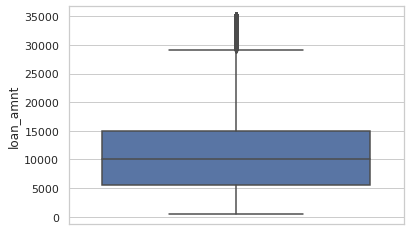

In [0]:
sns.set(style="whitegrid")
sns.boxplot(y=df.loan_amnt)

In [0]:
df.describe()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies
count,3.893700e+04,38937.000000,38937.000000,38937.000000,38937.000000,38937.000000,3.893700e+04,38937.000000,38937.000000,38937.000000,38937.000000,38937.000000,38937.000000,38937.000000,38937.000000,38937.000000,38937.000000,38937.000000,38937.000000,38937.000000,38937.000000,38937.000000,38937.000000,38937.000000,38937.000000,38937.000000,38937.000000
mean,8.620738e+05,11247.970439,10973.287618,10548.512595,0.120418,324.756877,6.900425e+04,13.362382,0.145363,0.865732,12.030074,9.296428,0.055449,13392.270180,0.487790,22.152272,52.254103,52.011213,12211.472950,11750.108575,9834.079083,2281.970220,1.328033,94.095695,12.102286,2704.282732,0.043198
std,2.534601e+05,7471.739408,7199.326345,7104.374465,0.037430,208.820843,6.320403e+04,6.669048,0.489809,1.066685,21.990996,4.382289,0.237989,15848.581819,0.287468,11.395272,378.841331,377.479914,9067.533732,8929.109967,7078.255720,2625.009916,7.139203,684.381010,146.925319,4467.082745,0.204188
min,8.036400e+04,500.000000,500.000000,0.000000,0.054200,16.080000,4.000000e+03,0.000000,0.000000,0.000000,-1.000000,2.000000,0.000000,0.000000,-1.000000,2.000000,0.000000,0.000000,33.730000,0.000000,0.000000,6.220000,0.000000,0.000000,0.000000,0.010000,0.000000
25%,6.758090e+05,5500.000000,5400.000000,5000.000000,0.092500,167.340000,4.080000e+04,8.240000,0.000000,0.000000,-1.000000,6.000000,0.000000,3728.000000,0.255000,14.000000,0.000000,0.000000,5598.284713,5315.780000,4650.000000,666.730000,0.000000,0.000000,0.000000,221.190000,0.000000
50%,8.582830e+05,10000.000000,9700.000000,9000.000000,0.118600,280.390000,5.900400e+04,13.450000,0.000000,1.000000,-1.000000,9.000000,0.000000,8873.000000,0.494000,20.000000,0.000000,0.000000,9958.640000,9489.360000,8000.000000,1356.740000,0.000000,0.000000,0.000000,554.050000,0.000000
75%,1.050176e+06,15000.000000,15000.000000,14497.884390,0.146100,430.780000,8.250000e+04,18.630000,0.000000,1.000000,21.000000,12.000000,0.000000,17080.000000,0.724000,29.000000,0.000000,0.000000,16605.880000,16000.610000,13800.000000,2861.030000,0.000000,0.000000,0.000000,3344.420000,0.000000
max,1.314167e+06,35000.000000,35000.000000,35000.000000,0.245900,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,120.000000,44.000000,4.000000,149588.000000,0.999000,90.000000,6311.470000,6307.370000,58563.679930,58563.680000,35000.020000,23563.680000,180.200000,29623.350000,7002.190000,36115.200000,2.000000


DIGGING DEEPER ON ANNUAL INCOME
<BR>--out_prncp	out_prncp_inv<br>	total_pymnt	total_pymnt_inv	total_rec_prncp	total_rec_int,revol_bal

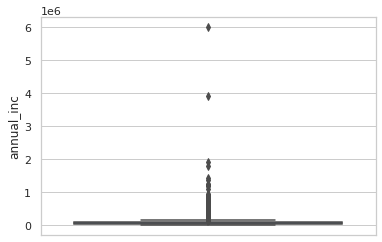

In [0]:
sns.set(style="whitegrid")
sns.boxplot(y=df.annual_inc)

In [0]:
df.total_pymnt.quantile([0,0.001,0.01,.025,.05,.1, .25, .5, .75,.975 ,.99,1],)

0.000       33.730000
0.001      199.399520
0.010      854.751600
0.025     1290.786000
0.050     1939.690056
0.100     3005.160716
0.250     5598.284713
0.500     9958.640000
0.750    16605.880000
0.975    35624.909462
0.990    42341.333333
1.000    58563.679930
Name: total_pymnt, dtype: float64

In [0]:
df.annual_inc.quantile([0,0.001,0.01,.025,.05,.1, .25, .5, .75,.975 ,.99 ,1],)

0.000       4000.000
0.001       8498.208
0.010      14400.000
0.025      19200.000
0.050      24000.000
0.100      30000.000
0.250      40800.000
0.500      59004.000
0.750      82500.000
0.975     175000.000
0.990     234853.440
1.000    6000000.000
Name: annual_inc, dtype: float64

In [0]:
df = df[df.annual_inc.between(df.annual_inc.quantile(0), df.annual_inc.quantile(.99))]

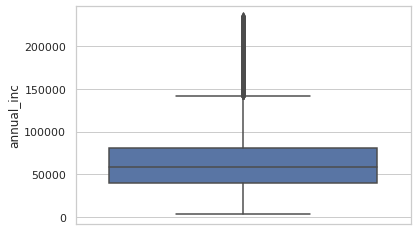

In [0]:
sns.set(style="whitegrid")
sns.boxplot(y=df.annual_inc)



##UNIVARIATE ANALYSIS


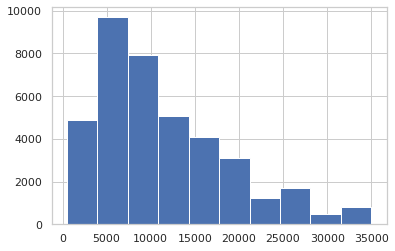

In [0]:
df.loan_amnt.hist()

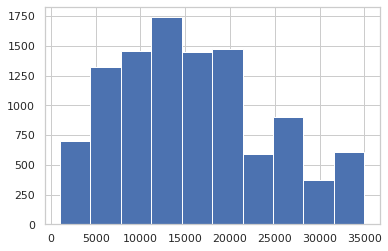

In [0]:
df[df.term == '60 months'].loan_amnt.hist()

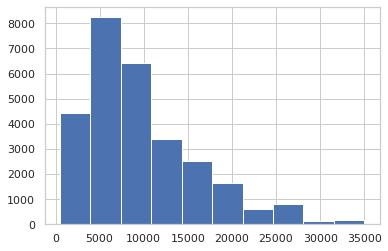

In [0]:
df[df.term == '36 months'].loan_amnt.hist()

In [0]:
pd.crosstab(index=  [df.verification_status],columns = df.loan_status, values= df.loan_amnt , aggfunc ='count' , normalize= 'index'  )

loan_status,Charged Off,Current,Fully Paid
verification_status,,,
Not Verified,0.122667,0.014028,0.863305
Source Verified,0.142442,0.031096,0.826462
Verified,0.158767,0.047161,0.794072


Checking impact  of loan amount 

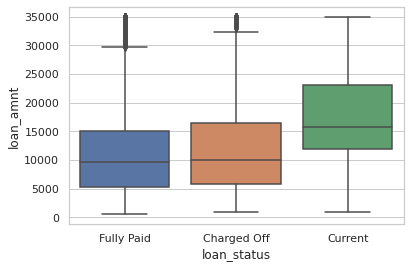

In [0]:
sns.set(style="whitegrid")
sns.boxplot(y=df.loan_amnt , x= df.loan_status)

Loan amount doesnt seem to have major impact on status , although loan amount is more varied in case of charged off loans.

LETS OBSERVE IMPACT OF ANNUAL INCOME ON LOAN STATUS

In [0]:
df.annual_inc.describe()

count     38547.000000
mean      65609.736975
std       35171.339826
min        4000.000000
25%       40200.000000
50%       58260.000000
75%       81000.000000
max      234600.000000
Name: annual_inc, dtype: float64

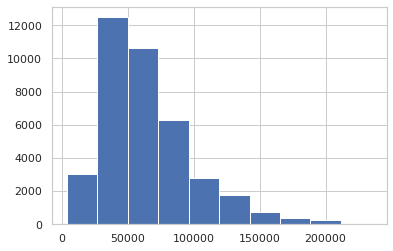

In [0]:
df.annual_inc.hist()

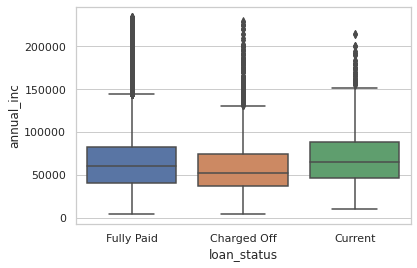

In [0]:
sns.set(style="whitegrid")
sns.boxplot(y=df.annual_inc , x= df.loan_status)

the annual income seems to be on the lower side in case of charged off loans

CHECKING THE IMPACT OF dti on LOAN STATUS

In [0]:
df.dti.describe()

count    38547.000000
mean        13.423189
std          6.654058
min          0.000000
25%          8.330000
50%         13.510000
75%         18.680000
max         29.990000
Name: dti, dtype: float64

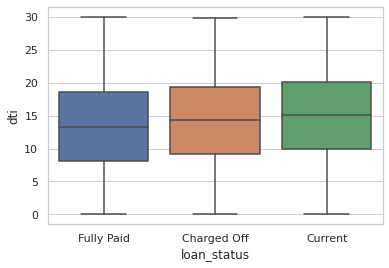

In [0]:
sns.set(style="whitegrid")
sns.boxplot(y=df.dti , x= df.loan_status) 

CHECKING THE IMPACT OF LAST 6 MONTHS ENQUIRY on LOAN STATUS

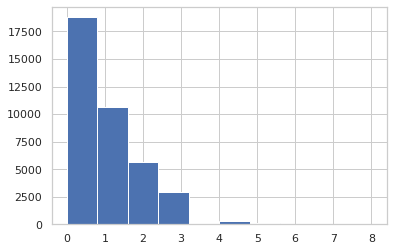

In [0]:
df.inq_last_6mths.hist()

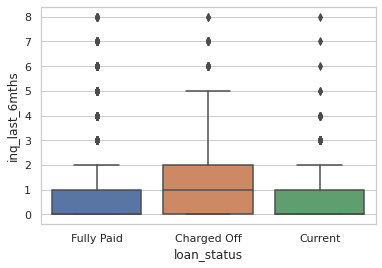

In [0]:
sns.set(style="whitegrid")
sns.boxplot(y=df.inq_last_6mths , x= df.loan_status) 

chances of loan being charged off seems to increase with increase in enquiries

checking impact of interest rate

In [0]:
df.int_rate.describe()

count    38547.000000
mean         0.120263
std          0.037355
min          0.054200
25%          0.090700
50%          0.118600
75%          0.145900
max          0.245900
Name: int_rate, dtype: float64

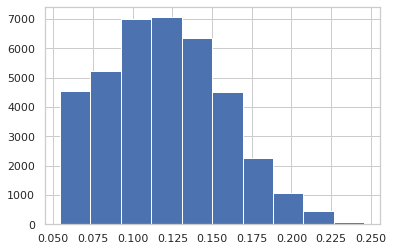

In [0]:
df.int_rate.hist()

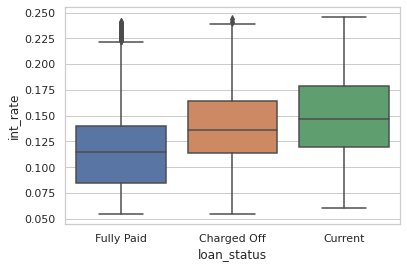

In [0]:
sns.set(style="whitegrid")
sns.boxplot(y=df.int_rate , x= df.loan_status) 

Increase in intrest rate  increases the chances of loan being charged off

checking impact of utilization rate

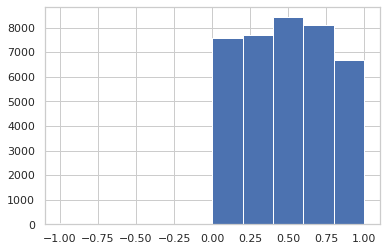

In [0]:
df.revol_util.hist()

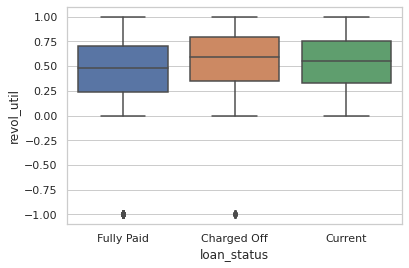

In [0]:
sns.set(style="whitegrid")
sns.boxplot(y=df.revol_util , x= df.loan_status) 

Increase in utilization of revolving line  increases the chances of loan being charged off

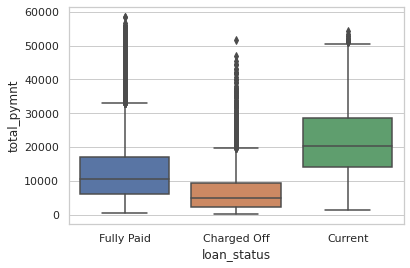

In [0]:
sns.set(style="whitegrid")
sns.boxplot(y=df.total_pymnt , x= df.loan_status) 

##BIVARIATE ANALYSIS

In [0]:
df.groupby(['term','loan_status'])['loan_amnt'].describe()

count          mean  ...      75%      max
term      loan_status                         ...                  
36 months Charged Off   3055.0   9306.497545  ...  12000.0  35000.0
          Fully Paid   25283.0   9624.114029  ...  12250.0  35000.0
60 months Charged Off   2380.0  15783.844538  ...  21000.0  35000.0
          Current       1140.0  17053.991228  ...  23000.0  35000.0
          Fully Paid    7079.0  15425.526204  ...  20000.0  35000.0

[5 rows x 8 columns]

In [0]:
df.groupby(['grade','loan_status'])['loan_amnt'].describe()
pd.crosstab(index = [df.grade] , columns = df.loan_status , values = df.loan_amnt, aggfunc = 'count' , normalize= 'index')

loan_status,Charged Off,Current,Fully Paid
grade,,,
A,0.059380,0.004026,0.936594
B,0.117028,0.029257,0.853714
C,0.163265,0.033464,0.803270
D,0.206950,0.042857,0.750193
E,0.248481,0.063997,0.687522
F,0.301649,0.070805,0.627546
G,0.317308,0.054487,0.628205


In [0]:
df.groupby(['term','grade','loan_status'])['loan_amnt'].describe()

count          mean  ...       75%      max
term      grade loan_status                        ...                   
36 months A     Charged Off   553.0   7732.142857  ...  10000.00  35000.0
                Fully Paid   8948.0   8647.773245  ...  11006.25  35000.0
          B     Charged Off   943.0   9221.102863  ...  12000.00  35000.0
                Fully Paid   8163.0  10075.349136  ...  14000.00  35000.0
          C     Charged Off   790.0   8852.278481  ...  12000.00  35000.0
                Fully Paid   4755.0   9280.026288  ...  12000.00  35000.0
          D     Charged Off   537.0  10004.748603  ...  13000.00  35000.0
                Fully Paid   2572.0  11026.564930  ...  15000.00  35000.0
          E     Charged Off   162.0  11997.685185  ...  16875.00  35000.0
                Fully Paid    667.0  12980.997001  ...  18000.00  35000.0
          F     Charged Off    49.0  16808.163265  ...  25000.00  35000.0
                Fully Paid    145.0  13513.793103  ...  20500.00  30000.0
          G     Charged Off    21.0  15566.666667  ...  20500.00  35000.0
                Fully Paid     33.0  18074.242424  ...  25000.00  25000.0
60 months A     Charged Off    37.0   9694.594595  ...  12000.00  24250.0
                Current        40.0  10174.375000  ...  13481.25  17475.0
                Fully Paid    358.0  10202.513966  ...  14000.00  24250.0
          B     Charged Off   437.0  14518.192220  ...  19700.00  35000.0
                Current       345.0  17355.797101  ...  24000.00  35000.0
                Fully Paid   1904.0  14723.936450  ...  20000.00  35000.0
          C     Charged Off   498.0  14570.732932  ...  20000.00  35000.0
                Current       264.0  16617.613636  ...  21031.25  35000.0
                Fully Paid   1582.0  15389.048673  ...  20987.50  35000.0
          D     Charged Off   535.0  14575.560748  ...  19200.00  35000.0
                Current       222.0  15494.819820  ...  20000.00  35000.0
                Fully Paid   1314.0  14314.250381  ...  19593.75  35000.0
          E     Charged Off   533.0  17019.136961  ...  24000.00  35000.0
                Current       179.0  18333.798883  ...  25000.00  35000.0
                Fully Paid   1256.0  17063.117038  ...  24250.00  35000.0
          F     Charged Off   262.0  19926.431298  ...  25000.00  35000.0
                Current        73.0  21947.260274  ...  30400.00  35000.0
                Fully Paid    502.0  18701.195219  ...  25000.00  35000.0
          G     Charged Off    78.0  19440.064103  ...  25000.00  35000.0
                Current        17.0  19766.176471  ...  25875.00  35000.0
                Fully Paid    163.0  21697.852761  ...  25000.00  35000.0

[35 rows x 8 columns]

In [0]:
df.groupby(['sub_grade','loan_status'])['loan_amnt'].describe()

count          mean  ...      75%      max
sub_grade loan_status                        ...                  
A1        Charged Off    30.0   7223.333333  ...  10000.0  19000.0
          Fully Paid   1098.0   7311.816940  ...  10000.0  17500.0
A2        Charged Off    72.0   6805.555556  ...   8000.0  30000.0
          Fully Paid   1405.0   7442.686833  ...  10000.0  32000.0
A3        Charged Off    99.0   7818.686869  ...  10000.0  30000.0
...                       ...           ...  ...      ...      ...
G4        Current         2.0  19000.000000  ...  19500.0  20000.0
          Fully Paid     41.0  21638.414634  ...  25000.0  35000.0
G5        Charged Off    10.0  17635.000000  ...  21812.5  25000.0
          Current         1.0  25000.000000  ...  25000.0  25000.0
          Fully Paid     18.0  20587.500000  ...  24812.5  35000.0

[101 rows x 8 columns]

In [0]:
df.groupby(['home_ownership','loan_status'])['loan_amnt'].describe()

count          mean  ...      75%      max
home_ownership loan_status                         ...                  
MORTGAGE       Charged Off   2266.0  14127.592674  ...  20000.0  35000.0
               Current        638.0  18588.714734  ...  25000.0  35000.0
               Fully Paid   14485.0  12235.395236  ...  16000.0  35000.0
OTHER          Charged Off     18.0  13747.222222  ...  16000.0  25000.0
               Fully Paid      80.0   9969.062500  ...  15000.0  25000.0
OWN            Charged Off    425.0  11029.705882  ...  15000.0  35000.0
               Current         83.0  14509.638554  ...  20000.0  35000.0
               Fully Paid    2480.0  10031.179435  ...  14000.0  35000.0
RENT           Charged Off   2726.0  10656.162876  ...  15000.0  35000.0
               Current        419.0  15221.121718  ...  20000.0  35000.0
               Fully Paid   15317.0   9768.180780  ...  12875.0  35000.0

[11 rows x 8 columns]

In [0]:

pd.crosstab(index=  [df.term,df.home_ownership],columns = df.loan_status, values= df.loan_amnt , aggfunc ='count' , normalize= 'index'  )

loan_status               Charged Off   Current  Fully Paid
term      home_ownership                                   
36 months MORTGAGE           0.095920  0.000000    0.904080
          OTHER              0.175258  0.000000    0.824742
          OWN                0.105192  0.000000    0.894808
          RENT               0.117536  0.000000    0.882464
60 months MORTGAGE           0.201770  0.112920    0.685310
          OTHER              1.000000  0.000000    0.000000
          OWN                0.251989  0.110080    0.637931
          RENT               0.250119  0.099905    0.649976

In [0]:
pd.crosstab(index= [df.verification_status,df.home_ownership,df.term ] ,columns= [df.loan_status] , values= df.loan_amnt ,aggfunc= 'count',normalize= 'index')

loan_status                                   Charged Off   Current  Fully Paid
verification_status home_ownership term                                        
Not Verified        MORTGAGE       36 months     0.098025  0.000000    0.901975
                                   60 months     0.193935  0.092578    0.713488
                    OTHER          36 months     0.176471  0.000000    0.823529
                                   60 months     1.000000  0.000000    0.000000
                    OWN            36 months     0.107114  0.000000    0.892886
                                   60 months     0.207254  0.119171    0.673575
                    RENT           36 months     0.117151  0.000000    0.882849
                                   60 months     0.211356  0.092534    0.696109
Source Verified     MORTGAGE       36 months     0.080416  0.000000    0.919584
                                   60 months     0.202166  0.111191    0.686643
                    OTHER          36 months     0.100000  0.000000    0.900000
                    OWN            36 months     0.092803  0.000000    0.907197
                                   60 months     0.280335  0.117155    0.602510
                    RENT           36 months     0.117724  0.000000    0.882276
                                   60 months     0.261836  0.091822    0.646341
Verified            MORTGAGE       36 months     0.103839  0.000000    0.896161
                                   60 months     0.204847  0.122178    0.672975
                    OTHER          36 months     0.194444  0.000000    0.805556
                    OWN            36 months     0.113872  0.000000    0.886128
                                   60 months     0.257764  0.099379    0.642857
                    RENT           36 months     0.118106  0.000000    0.881894
                                   60 months     0.261222  0.109789    0.628989

In [0]:
pd.crosstab([df.purpose ,df.term],df.loan_status,values=df.loan_amnt,aggfunc=sum,
           normalize='index')

loan_status                   Charged Off   Current  Fully Paid
purpose            term                                        
car                36 months     0.088914  0.000000    0.911086
                   60 months     0.142204  0.091835    0.765961
credit_card        36 months     0.077781  0.000000    0.922219
                   60 months     0.210219  0.113309    0.676473
debt_consolidation 36 months     0.102491  0.000000    0.897509
                   60 months     0.235596  0.115326    0.649078
educational        36 months     0.188924  0.000000    0.811076
                   60 months     0.450640  0.000000    0.549360
home_improvement   36 months     0.092040  0.000000    0.907960
                   60 months     0.150626  0.123795    0.725580
house              36 months     0.089028  0.000000    0.910972
                   60 months     0.219893  0.142898    0.637209
major_purchase     36 months     0.083465  0.000000    0.916535
                   60 months     0.162198  0.085700    0.752102
medical            36 months     0.113455  0.000000    0.886545
                   60 months     0.231432  0.092575    0.675993
moving             36 months     0.125117  0.000000    0.874883
                   60 months     0.173540  0.085607    0.740852
other              36 months     0.124880  0.000000    0.875120
                   60 months     0.237224  0.150601    0.612176
renewable_energy   36 months     0.176986  0.000000    0.823014
                   60 months     0.174284  0.082267    0.743449
small_business     36 months     0.215044  0.000000    0.784956
                   60 months     0.347900  0.130214    0.521885
vacation           36 months     0.106632  0.000000    0.893368
                   60 months     0.294292  0.100342    0.605366
wedding            36 months     0.079590  0.000000    0.920410
                   60 months     0.164028  0.110534    0.725438

Long term loans for vacation , education ,small business ,credit card or for no reasons is a bad idea

In [0]:
pd.crosstab([df.purpose],df.loan_status,values=df.loan_amnt,aggfunc=sum,
           normalize='columns')

loan_status,Charged Off,Current,Fully Paid
purpose,,,
car,0.017396,0.019804,0.025150
credit_card,0.104634,0.101466,0.142572
debt_consolidation,0.552807,0.560520,0.527258
educational,0.006310,0.000000,0.004642
home_improvement,0.060232,0.093831,0.079455
house,0.010765,0.015408,0.011031
major_purchase,0.028927,0.024680,0.043126
medical,0.013429,0.010036,0.012874
moving,0.008059,0.004829,0.009080


In [0]:
#pd.crosstab()